<a href="https://www.kaggle.com/code/vinciusmayrink/predicting-wine-classes-with-scikit-learn?scriptVersionId=169781114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Wine classification with Scikit-Learn

# The problem domain

This project aims to develop a machine learning model for predicting wine types (classes) based on a set of analytical characteristics. The model will learn from historical data to identify patterns between the features (e.g., acidity, alcohol content) and the corresponding wine class.

We will explore and compare different machine learning algorithms suitable for classification tasks. Common choices include Support Vector Machines (SVM), Random Forests, or Logistic Regression.

This notebook will serve as a record of our exploration and development process as we build a machine learning model for wine classification.

The data is available at [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

# Importing libraries

In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importing dataset

In [87]:
wine = load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

# Checking the data

In [88]:
print(wine.data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [89]:
print(wine.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

# Understanding the data

Before diving into model building, it's crucial to understand the characteristics of our wine dataset. Exploratory Data Analysis (EDA) will help us gain insights into the data, identify potential issues, and guide feature selection for the machine learning model.

The insights gained from EDA will be crucial for data cleaning and feature selection. We might identify features with significant missing values that need to be addressed, or features with low variance that might not be informative for the model. The analysis will also guide which features to include in the model training process.

First, running the *Correlation Matrix*. Calculating the Pearson's correlation coefficient between numerical features to quantify the strength and direction of linear relationships.

In [90]:
corr_matrix = df_wine_full.corr()
print(corr_matrix["class"].sort_values(ascending=False))

class                           1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: class, dtype: float64


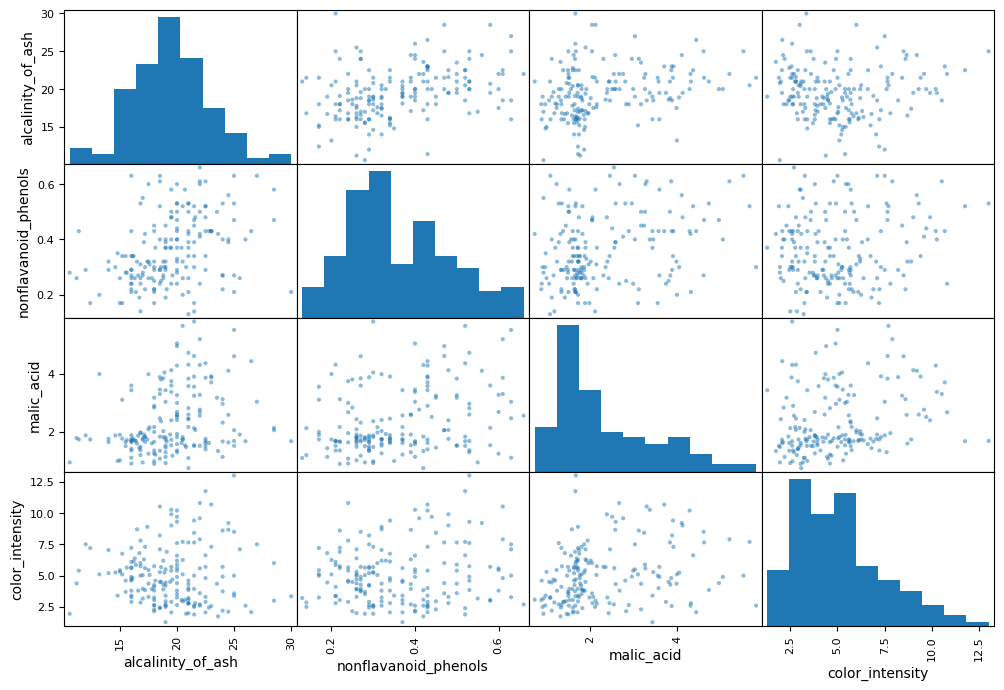

In [91]:
df_wine_full = pd.concat([wine.data, wine.target], axis=1)
df_wine_full = df_wine_full.rename(columns={'target': 'class'})
attributes = ["alcalinity_of_ash", "nonflavanoid_phenols", "malic_acid", "color_intensity"]
scatter_matrix(df_wine_full[attributes], figsize=(12, 8))
plt.show()

Plotting the correlations of all features available

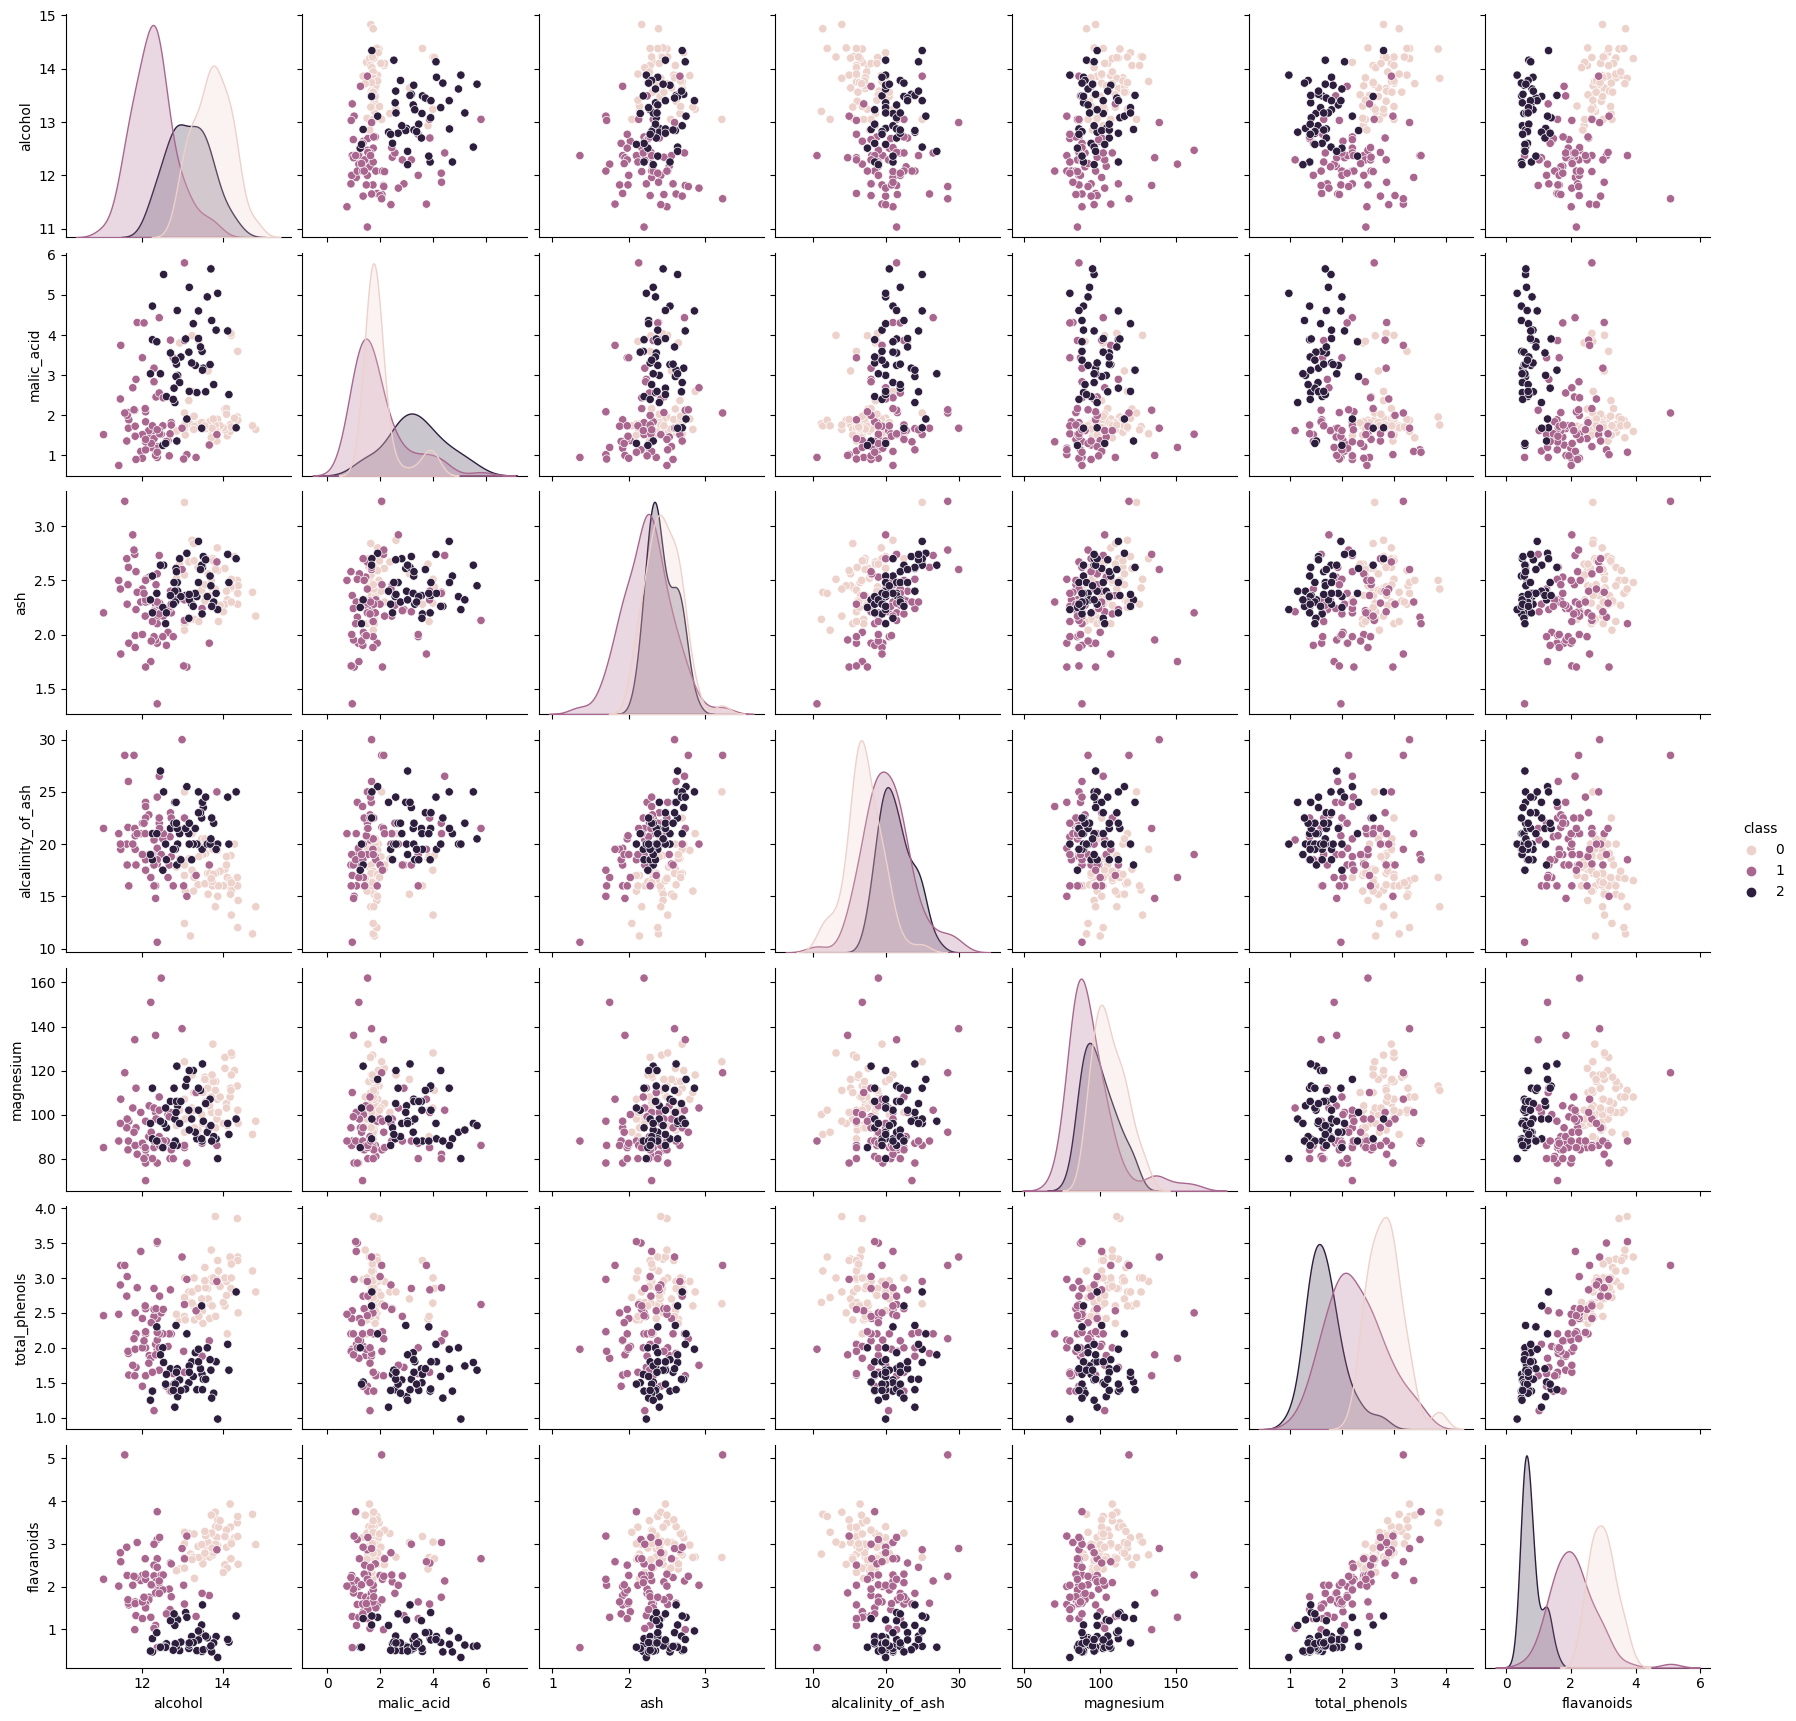

In [92]:
warnings.filterwarnings('ignore') # ignore seaborn warnings

feature_set_1 = [
    'alcohol', 'malic_acid', 'ash',
    'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'class'
]

sns.pairplot(df_wine_full[feature_set_1], hue="class")

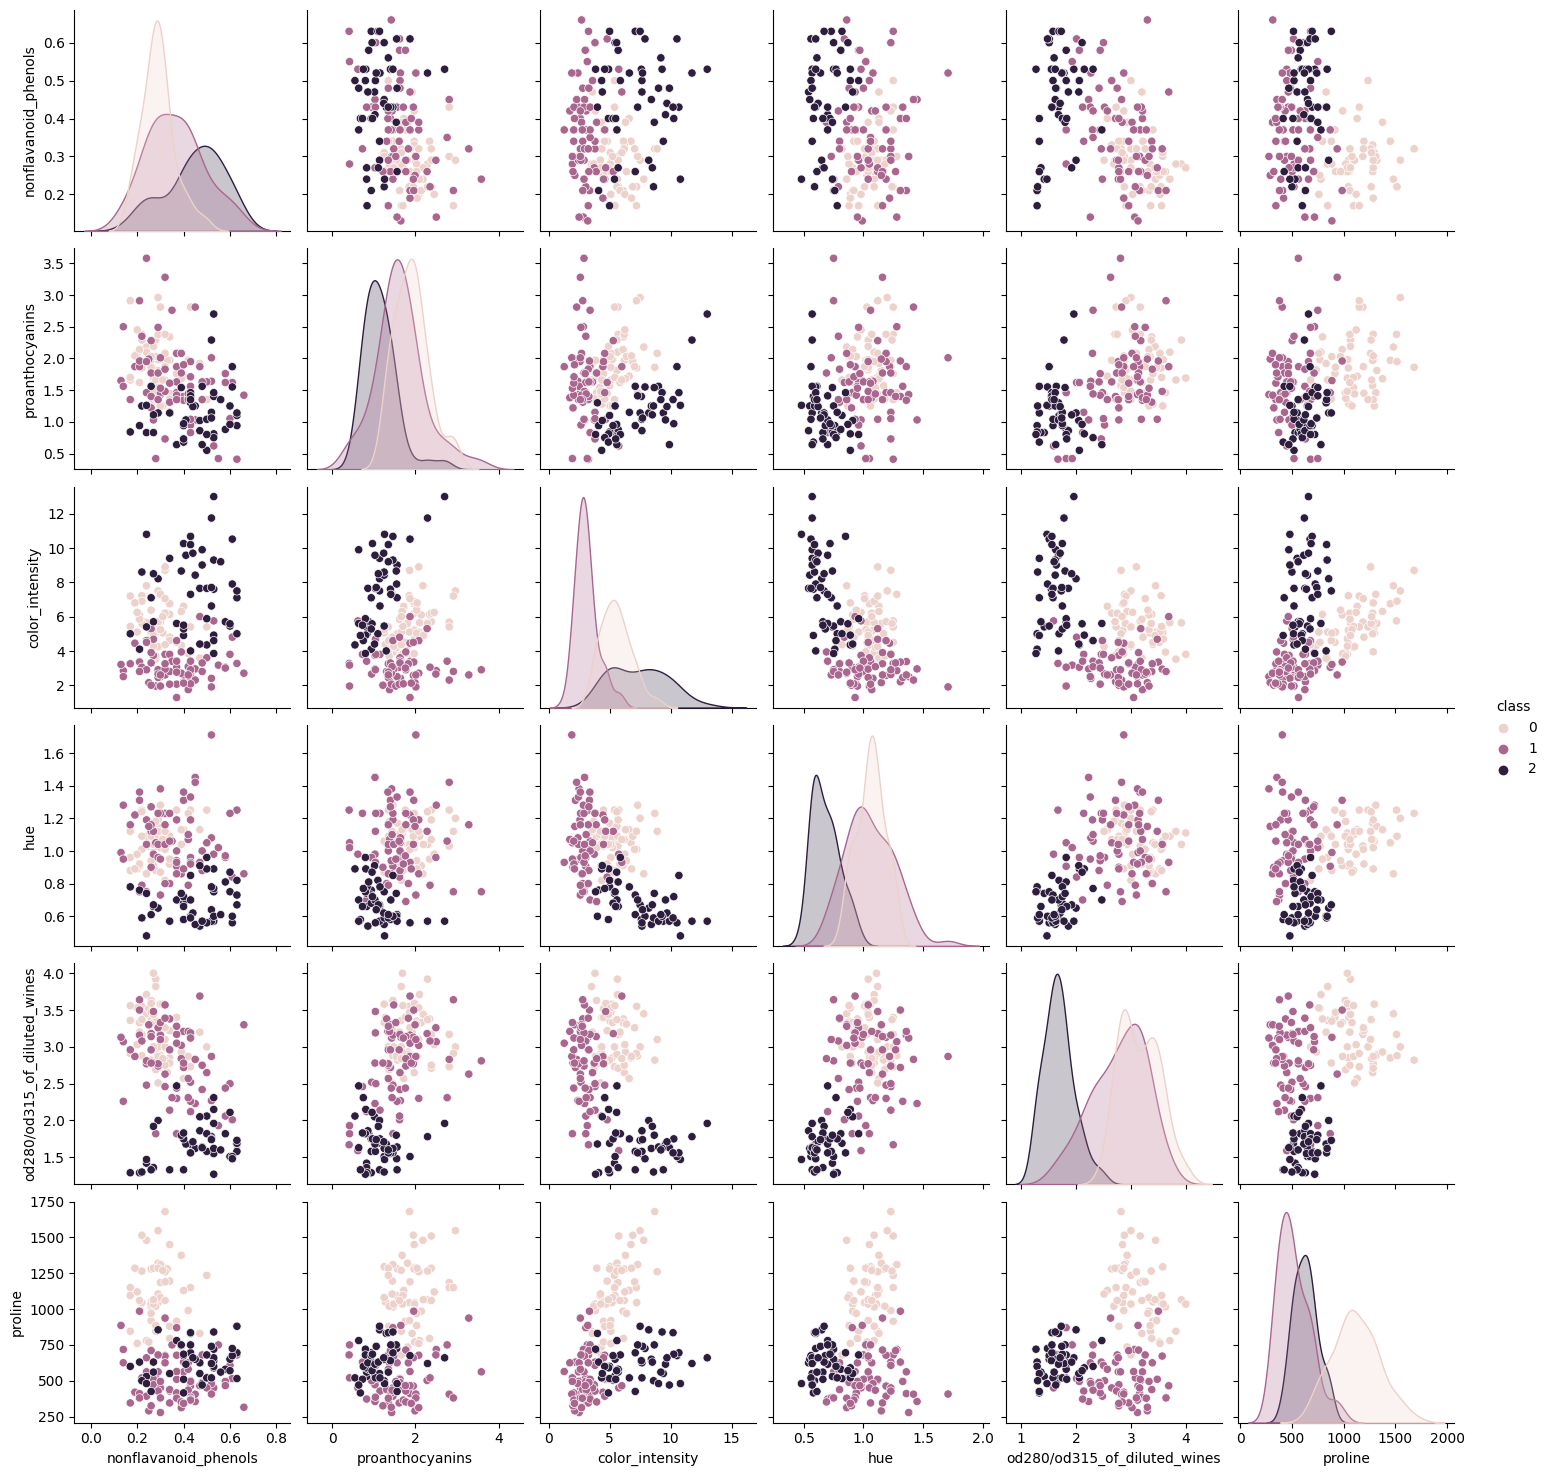

In [93]:
feature_set_2 = [
    'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
    'proline', 'class'
]

sns.pairplot(df_wine_full[feature_set_2], hue="class")

# Model training

We will explore and compare different machine learning algorithms suitable for classification tasks. Common choices include Random Forests, or Logistic Regression.

In [94]:
X = wine.data[attributes]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Logistic Regression

Logistic regression is a statistical method commonly used for classification tasks in machine learning. It estimates the probability of an event happening based on one or more independent variables.

Making some hyperparameter tunning

In [95]:
%%time

param_grid = [
    {'C': 10**np.linspace(-3,3,20)}
]

log_reg = LogisticRegression(solver='lbfgs', penalty='none', random_state=42)
lr_gridsearch = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', 
                             refit=True)
lr_gridsearch.fit(X_train, y_train)

print(lr_gridsearch.best_score_)
print(lr_gridsearch.best_params_)

0.8600000000000001
{'C': 0.001}
CPU times: user 5.42 s, sys: 69 ms, total: 5.49 s
Wall time: 5.49 s


In [96]:
%%time

new_log_reg = LogisticRegression(solver='lbfgs', penalty='none', random_state=42)
new_log_reg.set_params(**lr_gridsearch.best_params_)
scores = cross_val_score(new_log_reg, X_train, y_train, cv=10, scoring="accuracy")
print(scores.mean())

0.8600000000000001
CPU times: user 278 ms, sys: 4.99 ms, total: 283 ms
Wall time: 281 ms


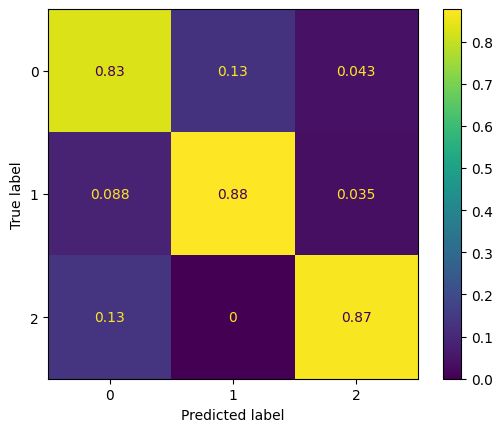

In [97]:
y_train_pred_reg = cross_val_predict(new_log_reg, X_train, y_train, cv=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_reg, normalize="true")
plt.show()

In [98]:
precision_reg = precision_score(y_train, y_train_pred_reg, average=None)
recall_reg = recall_score(y_train, y_train_pred_reg, average=None)
print("Mean precision for linear regression: " + str(precision_reg.mean()))
print("Mean recall for linear regression: " + str(recall_reg.mean()))

Mean precision for linear regression: 0.8602224673653245
Mean recall for linear regression: 0.8584670897100907


In [99]:
f1_score_reg = f1_score(y_train, y_train_pred_reg, average=None)
print(f1_score_reg.mean())

0.8591519174041298


## Random Forest


Random forest is a powerful and versatile machine learning algorithm that excels in both classification and regression tasks. It operates by constructing a multitude of decision trees at training time, hence the name "forest."

In [100]:
%%time

param_grid = [{
    'max_depth': [2, 4, 8, 16, 32, 64], 
    'min_samples_leaf': [2, 4, 8, 16],
    'n_estimators': [10, 50, 100, 200, 500]
}]

forest_clf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(forest_clf, param_grid, cv=10, scoring='accuracy', refit=True)
rf_gridsearch.fit(X_train, y_train)

print(rf_gridsearch.best_score_)
print(rf_gridsearch.best_params_)

0.9080952380952381
{'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
CPU times: user 7min 36s, sys: 2.89 s, total: 7min 39s
Wall time: 7min 39s


In [101]:
%%time

new_forest_clf = RandomForestClassifier(random_state=42)
new_forest_clf.set_params(**rf_gridsearch.best_params_)
scores = cross_val_score(new_forest_clf, X_train, y_train, cv=10, scoring="accuracy")
print(scores.mean())

0.9080952380952381
CPU times: user 2.25 s, sys: 14 ms, total: 2.26 s
Wall time: 2.26 s


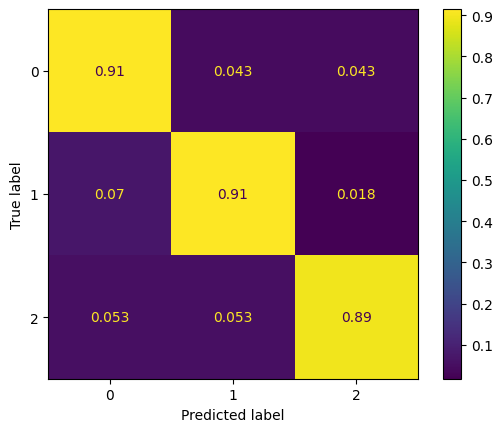

In [102]:
y_train_pred_forest = cross_val_predict(new_forest_clf, X_train, y_train, cv=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_forest, normalize="true")
plt.show()

In [103]:
precision_forest = precision_score(y_train, y_train_pred_forest, average=None)
recall_forest = recall_score(y_train, y_train_pred_reg, average=None)
print("Mean precision for linear regression: " + str(precision_forest.mean()))
print("Mean recall for linear regression: " + str(recall_forest.mean()))

Mean precision for linear regression: 0.9083471226328369
Mean recall for linear regression: 0.8584670897100907


In [104]:
f1_score_forest = f1_score(y_train, y_train_pred_forest, average=None)
print(f1_score_forest.mean())

0.907617994100295


# Validation

Evaluation of the trained model's performance on the separate testing fold of the data. This ensures the model is not simply memorizing the training data, but can generalize to unseen data.

## Logistic Regression

In [105]:
%%time

final_log_reg = LogisticRegression(solver='lbfgs', penalty='none', random_state=42)
final_log_reg.set_params(**lr_gridsearch.best_params_)
scores = cross_val_score(final_log_reg, X_test, y_test, cv=10, scoring="accuracy")
mean_score = scores.mean()
print(mean_score)

0.825
CPU times: user 252 ms, sys: 8 ms, total: 260 ms
Wall time: 259 ms


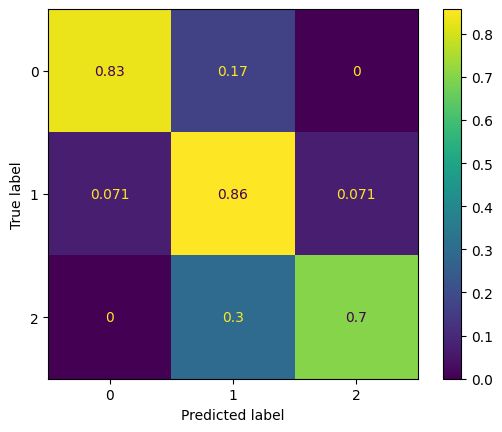

In [106]:
y_test_pred_reg = cross_val_predict(final_log_reg, X_test, y_test, cv=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_reg, normalize="true")
plt.show()

In [107]:
precision_test_reg = precision_score(y_test, y_test_pred_reg, average=None)
recall_test_reg = recall_score(y_test, y_test_pred_reg, average=None)
print("Mean precision for linear regression: " + str(precision_test_reg.mean()))
print("Mean recall for linear regression: " + str(recall_test_reg.mean()))

Mean precision for linear regression: 0.8299910873440286
Mean recall for linear regression: 0.7968253968253968


In [108]:
f1_score_forest = f1_score(y_test, y_test_pred_reg, average=None)
print(f1_score_forest.mean())

0.8071788478520596


## Random Forest

In [109]:
%%time

final_forest_clf = RandomForestClassifier(random_state=42)
final_forest_clf.set_params(**rf_gridsearch.best_params_)
scores = cross_val_score(final_forest_clf, X_test, y_test, cv=10, scoring="accuracy")
mean_score = scores.mean()
print(mean_score)

0.8166666666666668
CPU times: user 2.18 s, sys: 21 ms, total: 2.2 s
Wall time: 2.2 s


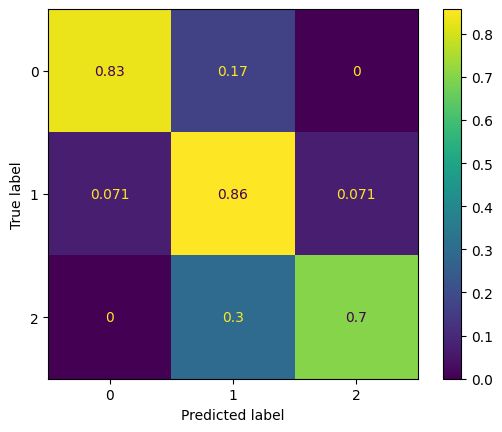

In [110]:
y_test_pred_forest = cross_val_predict(final_forest_clf, X_test, y_test, cv=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_reg, normalize="true")
plt.show()

In [111]:
precision_test_forest = precision_score(y_test, y_test_pred_forest, average=None)
precision_test_forest = recall_score(y_test, y_test_pred_forest, average=None)
print("Mean precision for random forest: " + str(precision_test_forest.mean()))
print("Mean recall for random forest: " + str(precision_test_forest.mean()))

Mean precision for random forest: 0.8007936507936507
Mean recall for random forest: 0.8007936507936507


In [112]:
f1_score_forest = f1_score(y_test, y_test_pred_forest, average=None)
print(f1_score_forest.mean())

0.7992702554106063


# Conclusions

As expected, both models performed slightly worse on unseen (test) data compared to the training data. This is a common observation in machine learning, and it's also true for our analysis.

Two key challenges in model performance are overfitting and underfitting. These represent opposite ends of the spectrum in terms of how well a model generalizes to unseen data. In this case, the models exhibit minimal signs of overfitting.

Comparing the results, both models showed very similar performance on the training and test data. Additionally, the random forest model required significantly more time for training and prediction. Considering these factors, logistic regression emerges as the more efficient choice between the two models evaluated.

# Further reading

* [Other kaggle datasets](https://www.kaggle.com/datasets)
* [Other Scikit-Learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

# Acknowledgements

Materials used for the analysis:

* [Gemini](https://gemini.google.com/)
* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/)